In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [3]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon) 
        f = f1_score(gt, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    
    return best_f1, best_epsilon


Number of datapoints in training set: 307
Number of dimensions/features: 2
[[13.409 13.763]
 [14.196 15.853]
 [14.915 16.174]
 [13.577 14.043]]


/Users/hayatibintehamzah/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


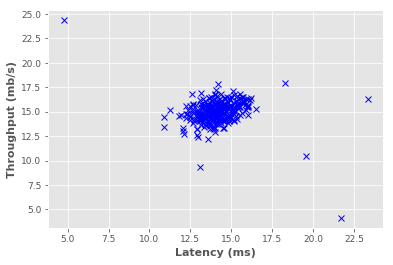

In [4]:
tr_data = read_dataset('tr_server_data.csv') 
cv_data = read_dataset('cv_server_data.csv') 
gt_data = read_dataset('gt_server_data.csv')

n_training_samples = tr_data.shape[0]
n_dim = tr_data.shape[1]

print('Number of datapoints in training set: %d' % n_training_samples)
print('Number of dimensions/features: %d' % n_dim)


print(tr_data[1:5,:])

plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.show()

In [8]:
tr_data

array([[    nan, 14.741 ],
       [13.409 , 13.763 ],
       [14.196 , 15.853 ],
       [14.915 , 16.174 ],
       [13.577 , 14.043 ],
       [13.922 , 13.406 ],
       [12.822 , 14.223 ],
       [15.676 , 15.892 ],
       [16.163 , 16.203 ],
       [12.666 , 14.899 ],
       [13.985 , 12.958 ],
       [14.061 , 14.549 ],
       [13.39  , 15.562 ],
       [13.394 , 15.627 ],
       [13.979 , 13.281 ],
       [14.168 , 14.466 ],
       [13.962 , 14.752 ],
       [14.459 , 15.07  ],
       [14.585 , 15.827 ],
       [12.074 , 13.067 ],
       [13.549 , 15.538 ],
       [13.986 , 14.788 ],
       [14.97  , 16.518 ],
       [14.256 , 15.294 ],
       [15.334 , 16.125 ],
       [15.635 , 16.491 ],
       [13.621 , 15.459 ],
       [14.815 , 15.34  ],
       [14.593 , 14.612 ],
       [14.489 , 15.641 ],
       [15.527 , 14.636 ],
       [13.975 , 14.765 ],
       [12.954 , 14.823 ],
       [12.888 , 15.076 ],
       [16.022 , 16.257 ],
       [14.926 , 16.297 ],
       [12.466 , 14.183 ],
 

In [5]:
mu, sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data,mu,sigma)

ValueError: array must not contain infs or NaNs

In [ ]:
#selecting optimal value of epsilon using cross validation
p_cv = multivariateGaussian(cv_data,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,gt_data)
print(fscore, ep)

In [ ]:
#selecting outlier datapoints 
outliers = np.asarray(np.where(p < ep))

In [ ]:
plt.figure()
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.plot(tr_data[outliers,0],tr_data[outliers,1],'ro')
plt.show()